In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf

In [2]:
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

In [3]:
N = 30000
test_data = np.concatenate((test_data, train_data[N:]), axis=0)
test_labels = np.concatenate((test_labels, train_labels[N:]), axis=0)

train_data = train_data[:N]
train_labels = train_labels[:N]

In [4]:
print(train_data.shape)
print(test_data.shape)

(30000, 28, 28)
(40000, 28, 28)


In [5]:
idx2label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

label = Ankle boot


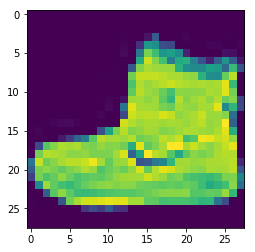

In [8]:
index = 0
print("label = {}".format(idx2label[train_labels[index]]))
plt.imshow(train_data[index])
plt.show()

---

In [32]:
train_labels = to_categorical(np.array(train_labels))
test_labels = to_categorical(np.array(test_labels))

In [33]:
# Validation data 
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [34]:
X_test = test_data
y_test = test_labels

In [35]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(24000, 28, 28)
(6000, 28, 28)
(40000, 28, 28)


In [36]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(24000, 10)
(6000, 10)
(40000, 10)


In [37]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
print("X_val: {}".format(X_val.shape))

X_val: (6000, 28, 28, 1)


In [38]:
# Data normalization 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

----

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [19]:
batch_size = 256
num_classes = 10
epochs = 100

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
__________